In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as K
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [ ]:
train = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/2d_cnn/train.pkl'
val = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/2d_cnn/val.pkl'
test = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/2d_cnn/test.pkl'

In [ ]:
train_dataset = pd.read_pickle(train)
val_dataset = pd.read_pickle(val)
test_dataset = pd.read_pickle(test)

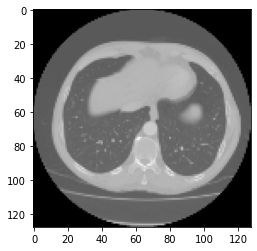

In [ ]:
plt.imshow(train_dataset.img.iloc[1], cmap='gray')

In [ ]:
WIDTH = 128
HEIGHT = 128

def resize_slices(slices):
  
  slices = np.array(slices).astype(np.float32)
  slices = np.reshape(slices, (WIDTH, HEIGHT))
  slices = np.expand_dims(slices, axis=2)

  return slices

In [ ]:
# train_dataset.img_volume = train_dataset.img_volume.apply(lambda slices: resize_slices(slices))
# val_dataset.img_volume = val_dataset.img_volume.apply(lambda slices: resize_slices(slices))


train_dataset.img = train_dataset.img.apply(lambda slices: resize_slices(slices))
val_dataset.img = val_dataset.img.apply(lambda slices: resize_slices(slices))
test_dataset.img = test_dataset.img.apply(lambda slices: resize_slices(slices))

In [ ]:
# train_samples = np.stack(train_dataset.img_volume)
# val_samples = np.stack(val_dataset.img_volume)

train_samples = np.stack(train_dataset.img)
val_samples = np.stack(val_dataset.img)
test_samples = np.stack(test_dataset.img)

In [ ]:
# y_train = to_categorical(train_dataset.label)
# y_val = to_categorical(val_dataset.label)

y_train = to_categorical(train_dataset.imv)
y_val = to_categorical(val_dataset.imv)
y_test = to_categorical(test_dataset.imv)

In [ ]:
# Baseline approach simple neural network 
'''
Convolution
Normalization
Max Pooling
Fully connected
Normalization
Decision Make
'''

def LesionNet():
  
  n_classes = 2
  image_width = 128
  image_height = 128

  if K.backend.image_data_format() == 'channels_first':
    
    input_shape = (1, image_width, image_height)
  else:
    input_shape = (image_width, image_height, 1)
  
  ##model building
  model = Sequential()
  #convolutional layer with rectified linear unit activation
  model.add(L.Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  #32 convolution filters used each of size 3x3
  #again
  model.add(L.Conv2D(64, (3, 3), activation='relu'))
  #64 convolution filters used each of size 3x3
  #choose the best features via pooling
  model.add(L.MaxPooling2D(pool_size=(2, 2)))
  #randomly turn neurons on and off to improve convergence
  model.add(L.Dropout(0.25))
  #flatten since too many dimensions, we only want a classification output
  model.add(L.Flatten())
  #fully connected to get all relevant data
  model.add(L.Dense(128, activation='relu'))
  #one more dropout for convergence' sake :) 
  model.add(L.Dropout(0.5))
  #output a softmax to squash the matrix into output probabilities
  model.add(L.Dense(n_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=[K.metrics.BinaryAccuracy(), 
                      K.metrics.Precision(), 
                      K.metrics.Recall(),
                      K.metrics.AUC()])

  return model

baseline_model = LesionNet()

h = baseline_model.fit(
                      x=train_samples,
                      y=y_train,
                      batch_size=128,
                      validation_data=(test_samples, y_test),
                      epochs=10)


Epoch 1/10
35/35 [==============================] - 6s 141ms/step - loss: 63.4374 - binary_accuracy: 0.5434 - precision_9: 0.5434 - recall_9: 0.5434 - auc_9: 0.5451 - val_loss: 19.4289 - val_binary_accuracy: 0.7105 - val_precision_9: 0.7105 - val_recall_9: 0.7105 - val_auc_9: 0.7141
Epoch 2/10
35/35 [==============================] - 5s 129ms/step - loss: 28.8234 - binary_accuracy: 0.6123 - precision_9: 0.6123 - recall_9: 0.6123 - auc_9: 0.6179 - val_loss: 19.9927 - val_binary_accuracy: 0.6125 - val_precision_9: 0.6125 - val_recall_9: 0.6125 - val_auc_9: 0.6101
Epoch 3/10
35/35 [==============================] - 5s 131ms/step - loss: 14.6218 - binary_accuracy: 0.6406 - precision_9: 0.6406 - recall_9: 0.6406 - auc_9: 0.6530 - val_loss: 14.9914 - val_binary_accuracy: 0.5912 - val_precision_9: 0.5912 - val_recall_9: 0.5912 - val_auc_9: 0.5891
Epoch 4/10
35/35 [==============================] - 5s 131ms/step - loss: 8.4556 - binary_accuracy: 0.6571 - precision_9: 0.6571 - recall_9: 0.6571 

In [ ]:
*Treinamento:* loss: 0.9241 - binary_accuracy: 0.6711 - precision_8: 0.6711 - recall_8: 0.6711 - *auc_8: 0.7242*
*Validação:* val_loss: 6.4818 - val_binary_accuracy: 0.4262 - val_precision_8: 0.4262 - val_recall_8: 0.4262 - *val_auc_8: 0.3321*
*Teste:* test_loss: 3.7914 - test_binary_accuracy: 0.6824 - test_precision_9: 0.6824 - test_recall_9: 0.6824 - *test_auc_9: 0.6968*